# Lab 3: Linear Regression

In this assignment, we will learn the Linear Regression model. 

First, please study the given example, which uses linear regression for the house price prediction task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model. 

Based on the given example and Lab Assignment 2, your task is to use the linear regression model to predict the medical cost for the dataset given in Lab Assignment 2. 

## 1. Example: Linear Regression for House Price Prediction

In this example, we use the house price dataset. It gives the attributes and price of each house. The task is to build a linear regression model to make prediction for the price of the house.

### 1.1 Preprocess the raw data

When given a new dataset, we need to deal with the missing values and categorical features. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt


df = pd.read_csv('../data/housing.csv')

# 0. fill in missing values
mean_val = df['total_bedrooms'].mean()
print(mean_val)
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_val)

print(f'looking for nan value\n', df.isnull().sum())

# 1. convert categorical features to numerical values
labelencoder = LabelEncoder()
df['ocean_proximity'] = labelencoder.fit_transform(df['ocean_proximity'])
print(df.info())

537.8705525375618
looking for nan value
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int64  
dtypes: f

In [2]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1


### 1.2 Split the preprocessed dataset into training set and testing set

For the supervised learning, we need to split the dataset into the training set and test set. The training set is used to learn model parameters and the testing set is used to evaluate the learned model. 

Note that the testing set is NOT allowed to be used in the training phase. 

In [3]:
# 2. split samples
house_fea = df.drop('median_house_value', axis=1).values
print(house_fea[0])
house_price = df['median_house_value'].values
print(house_price)
house_price = house_price / np.max(house_price)
print(house_price)


X_train, X_test, y_train, y_test = train_test_split(house_fea,
                                                    house_price,
                                                    test_size=0.2,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

[-122.23     37.88     41.      880.      129.      322.      126.
    8.3252    3.    ]
[452600 358500 352100 ...  92300  84700  89400]
[0.90519819 0.71699857 0.70419859 ... 0.18459963 0.16939966 0.17879964]
(16512, 9)
(4128, 9)


In [4]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,2.005932
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,2.005932
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,2.005932
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,2.005932
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,-0.112427
...,...,...,...,...,...,...,...,...,...
16507,0.808883,-0.872016,0.507194,-0.603337,-0.805492,-0.675847,-0.742833,1.307215,-0.818546
16508,1.073144,-0.759688,0.348490,0.203255,0.075188,0.287195,-0.133839,-0.436266,-0.112427
16509,0.599469,-0.755007,0.586545,-0.248786,0.072801,0.289833,0.070909,-0.496973,-0.818546
16510,-1.185540,0.906510,-1.079841,0.429046,0.139628,0.308303,0.154908,0.965450,-0.818546


### 1.3 Train the linear regression model 

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$



Here, we use the training set to learn the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$. 

Then, we compute MAE, MSE, and RMSE to see how well the learned model fit the training set. 

In [5]:
# 3. train the model
lr = LinearRegression()

lr.fit(X_train, y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred, y_train)
mse = mean_squared_error(y_train_pred, y_train)
rmse = np.sqrt(mse)
R2 = r2_score(y_train_pred, y_train)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print(f'R2 score is {R2}')

bias is 0.41438855869860675
coefficients  is [-0.17170955 -0.18189176  0.02984855 -0.0353864   0.09753502 -0.08776816
  0.03520256  0.15428789 -0.00090304]
prediction for training set:
MAE is: 0.10125365457873202
MSE is: 0.0192437559440504
RMSE is: 0.13872186541439818
R2 score is 0.4377635565837954


### 1.4 Evaluate the linear regression model

After obtaining the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$, the linear regression model is determined. Then, we need to evaluate this model to see how well this model generaizes on the testing set. 

prediction for testing set:
MAE is: 0.10369354831097966
MSE is: 0.020220019584503236
RMSE is: 0.14219711524677017
R2 score is 0.6142406531011786
[-0.15  0.85  1.85  2.85  3.85]
[0.15 1.15 2.15 3.15 4.15]
[0.09539981 0.09159982 1.         0.43719913 0.55599889]
[0.15123207 0.33283761 0.52950109 0.55153925 0.55656022]


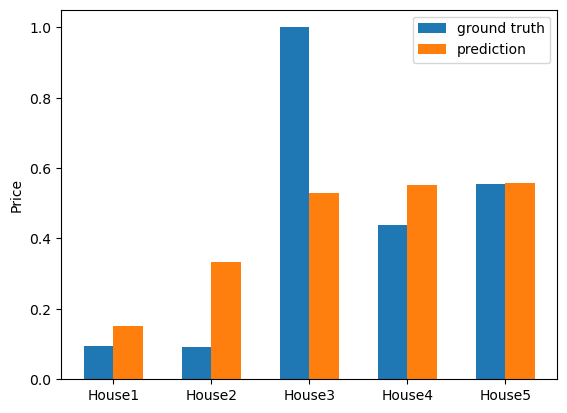

In [6]:
# 4. evaluate the model
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, y_test_pred)


print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print(f'R2 score is {R2}')


labels = ['House1', 'House2', 'House3', 'House4', 'House5']
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
print(x - width/2)
print(x + width/2)


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

print(y_test[0:5])
print(y_test_pred[0:5])

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## 2. Task: Linear Regression for Medical Cost Prediction

Following the given example, build a linear regression model for [the insurance dataset](./insurance.csv) to predict the medical cost.  


### 2.1 Preprocess the raw data

Based on your Lab Assignment 2, deal with the missing values and categorical features. 

In [7]:
# your code
insuranceDf = pd.read_csv('../data/insurance.csv')
print(insuranceDf.info())
print(insuranceDf.describe())
print(insuranceDf.isna().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [8]:
all_object = insuranceDf.select_dtypes('object')
OHE = OneHotEncoder(handle_unknown='ignore',
                    sparse_output=False).set_output(transform='pandas')

onehotencoder_form = OHE.fit_transform(insuranceDf[all_object.columns.values])
onehotencoder_form

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# adding the onehotencoder_form to the main dataframe and dropping the object columns
insuranceDf = pd.concat([insuranceDf, onehotencoder_form], axis=1).drop(
    columns=all_object.columns.values)

In [10]:
insuranceDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   float64
 5   sex_male          1338 non-null   float64
 6   smoker_no         1338 non-null   float64
 7   smoker_yes        1338 non-null   float64
 8   region_northeast  1338 non-null   float64
 9   region_northwest  1338 non-null   float64
 10  region_southeast  1338 non-null   float64
 11  region_southwest  1338 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 125.6 KB


### 1.2 Split the preprocessed dataset into training set and testing set

Use 80% of samples as the training set and 20% of samples as the testing set

In [11]:
X = insuranceDf.drop('charges', axis=1)
Y = insuranceDf['charges']

In [12]:
# your code
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [13]:
normalizer = StandardScaler()
normalizer.fit_transform(X_train)
normalizer.transform(X_test)

array([[ 0.40114007, -0.89153925,  0.73433626, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.23863782, -0.08946143, -0.91119211, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 1.75178229, -0.60845296, -0.91119211, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       ...,
       [-0.09646495, -0.41972876, -0.08842793, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 1.04091797,  2.78941026, -0.91119211, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       [ 0.82765867,  0.60252728, -0.08842793, ..., -0.56079971,
        -0.59966106,  1.74729228]])

### 1.3 Train the linear regression model 

Use the Linear regression model to do prediction

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$

Please output the learned model parameter $\mathbf{w}$ and see how the learned model fit the training set. 

In [14]:
# your code
model = LinearRegression()
model.fit(X_train, y_train)

print(f'Bias of {model.intercept_}')
print(f'coefficients  is {model.coef_}')
y_train_pred = model.predict(X_train)


mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_train, y_train_pred)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print(f'R2 score is {R2}')

Bias of -574.5357125101691
coefficients  is [ 2.56975706e+02  3.37092552e+02  4.25278784e+02  9.29584582e+00
 -9.29584582e+00 -1.18255644e+04  1.18255644e+04  4.59585244e+02
  8.89079180e+01 -1.98279052e+02 -3.50214110e+02]
prediction for training set:
MAE is: 4208.234572492221
MSE is: 37277681.70201866
RMSE is: 6105.545160099847
R2 score is 0.7417255854683333


### 1.4 Evaluate the linear regression model


Evaluate the learned model to see how well this model generaizes on the testing set. 

In [15]:
# your code
y_test_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, y_test_pred)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print(f'R2 score is {R2}')

prediction for testing set:
MAE is: 4181.194473753643
MSE is: 33596915.85136146
RMSE is: 5796.2846592762735
R2 score is 0.7835929767120723


[-0.175  0.825  1.825  2.825  3.825]
[0.175 1.175 2.175 3.175 4.175]
764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64
[ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656]


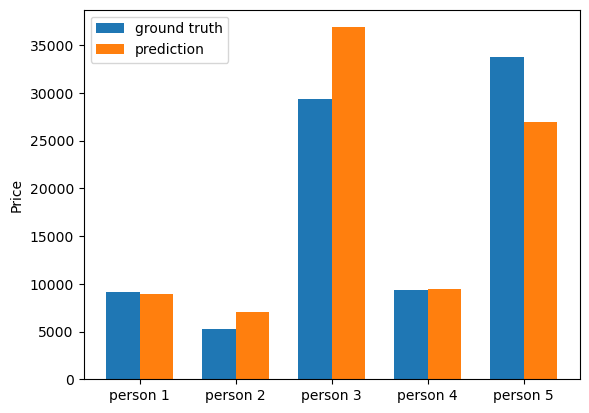

In [16]:

labels = ['person 1', 'person 2', 'person 3', 'person 4', 'person 5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
print(x - width/2)
print(x + width/2)


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

print(y_test[0:5])
print(y_test_pred[0:5])

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### 1.5 Use the ridge regression model to do prediction

$\min_{w}\frac{1}{n}\|y-Xw\|_2^2 + \lambda \|w\|_2^2$

* 1.5.1 Compare its performance on the testing set with that of the standard linear regression model $\min_{w}\frac{1}{n}\|y-Xw\|_2^2$

* 1.5.2 Use different $\lambda$ to see how it affects the performance of the ridge regression  model on the testing set


In [17]:
# your code

R_model = Ridge(0.1)
R_model.fit(X_train, y_train)
y_train_pred = R_model.predict(X_train)

mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_train, y_train_pred)

print('On train')
print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print(f'R2 score is {R2}')


y_test_pred = R_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, y_test_pred)

print('On test')
print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))
print(f'R2 score is {R2}')


lambdas = [0.5, 0.10, 1.00, 10.0, 100000]
for l in lambdas:
    ridge_model = Ridge(alpha=l)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    R2 = r2_score(y_test, y_pred_ridge)
    print(f"Accuracy of ridge model with lambda={l} : {R2:.3f}")

On train
prediction for testing set:
MAE is: 4208.718964220605
MSE is: 37277689.27528345
RMSE is: 6105.54578029544
R2 score is 0.7417255329977815
On test
prediction for testing set:
MAE is: 4181.804730676904
MSE is: 33599158.94621079
RMSE is: 5796.478150240091
R2 score is 0.783578528318016
Accuracy of ridge model with lambda=0.5 : 0.784
Accuracy of ridge model with lambda=0.1 : 0.784
Accuracy of ridge model with lambda=1.0 : 0.783
Accuracy of ridge model with lambda=10.0 : 0.782
Accuracy of ridge model with lambda=100000 : 0.119


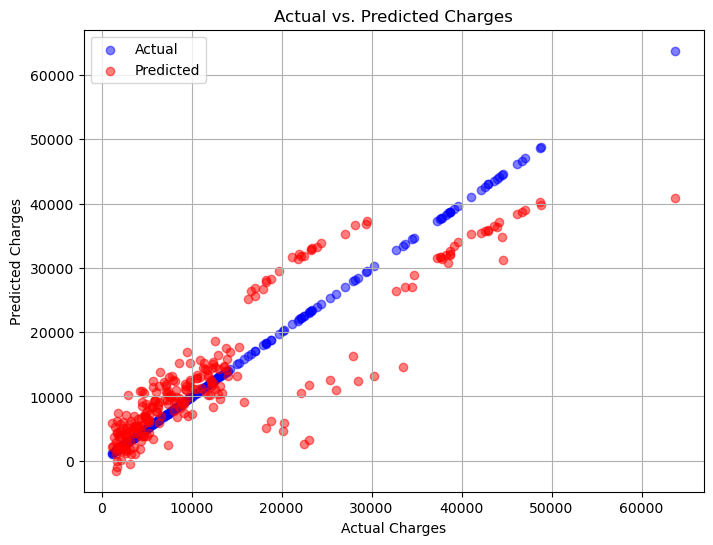

In [18]:
plt.figure(figsize=(8, 6))
# Plot actual charges in blue
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual')
# Plot predicted charges in red
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5, label='Predicted')

plt.title('Actual vs. Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.legend()
plt.show()